In [157]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)


In [158]:
#Load Dataset
data = pd.read_csv('../Dataset/lending_club_loan.csv')

In [159]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [160]:
data.shape

(396030, 27)

In [161]:
#EDA
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00
mean,14113.89,13.64,431.85,74203.18,17.38,11.31,0.18,15844.54,53.79,25.41,1.81,0.12
std,8357.44,4.47,250.73,61637.62,18.02,5.14,0.53,20591.84,24.45,11.89,2.15,0.36
min,500.00,5.32,16.08,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00
25%,8000.00,10.49,250.33,45000.00,11.28,8.00,0.00,6025.00,35.80,17.00,0.00,0.00
50%,12000.00,13.33,375.43,64000.00,16.91,10.00,0.00,11181.00,54.80,24.00,1.00,0.00
75%,20000.00,16.49,567.30,90000.00,22.98,14.00,0.00,19620.00,72.90,32.00,3.00,0.00
max,40000.00,30.99,1533.81,8706582.00,9999.00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [163]:
#Identifying the unique values for loan_status cloumn
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

<Axes: xlabel='loan_status', ylabel='count'>

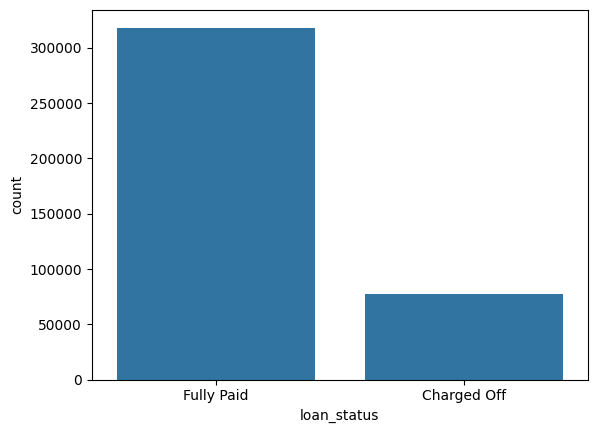

In [164]:
sns.countplot(data = data, x='loan_status')

In [165]:
#Identifying the unique values for term cloumn
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [166]:
#Convertig the nin-numeric value to numeric value for term column
data['term'] = data['term'].str.strip().replace({'36 months': 36, '60 months': 60})

In [167]:
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [168]:
#Convertig the nin-numeric value to numeric emp_length for term column
data['emp_length'] = data['emp_length'].str.strip().replace({'10+ years': 10, '4 years':4, '< 1 year':1, '6 years':6, '9 years':9,'2 years':2, '3 years':3, '8 years':8, '7 years':7, '5 years':5, '1 year':1})

In [169]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36,11.44,329.48,B,B4,Marketing,10.00,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36,11.99,265.68,B,B5,Credit analyst,4.00,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36,10.49,506.97,B,B3,Statistician,1.00,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36,6.49,220.65,A,A2,Client Advocate,6.00,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60,17.27,609.33,C,C5,Destiny Management Inc.,9.00,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [172]:
#Dropping Non-numerical Columns
data.drop(['address','grade','sub_grade','emp_title','home_ownership','verification_status','issue_d','loan_status','purpose','title','earliest_cr_line','initial_list_status','application_type'],axis=1,inplace=True)
data.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.00,36,11.44,329.48,10.00,117000.00,26.24,16.00,0.00,36369.00,41.80,25.00,0.00,0.00
1,8000.00,36,11.99,265.68,4.00,65000.00,22.05,17.00,0.00,20131.00,53.30,27.00,3.00,0.00
2,15600.00,36,10.49,506.97,1.00,43057.00,12.79,13.00,0.00,11987.00,92.20,26.00,0.00,0.00
3,7200.00,36,6.49,220.65,6.00,54000.00,2.60,6.00,0.00,5472.00,21.50,13.00,0.00,0.00
4,24375.00,60,17.27,609.33,9.00,55000.00,33.95,13.00,0.00,24584.00,69.80,43.00,1.00,0.00


In [173]:
data.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.00,0.39,0.17,0.95,0.10,0.34,0.02,0.20,-0.08,0.33,0.10,0.22,0.22,-0.11
term,0.39,1.00,0.43,0.15,0.06,0.06,0.04,0.08,-0.02,0.08,0.06,0.10,0.10,-0.02
int_rate,0.17,0.43,1.00,0.16,0.01,-0.06,0.08,0.01,0.06,-0.01,0.29,-0.04,-0.08,0.06
installment,0.95,0.15,0.16,1.00,0.09,0.33,0.02,0.19,-0.07,0.32,0.12,0.20,0.19,-0.10
emp_length,0.10,0.06,0.01,0.09,1.00,0.07,0.04,0.04,0.04,0.09,0.04,0.12,0.20,0.04
annual_inc,0.34,0.06,-0.06,0.33,0.07,1.00,-0.08,0.14,-0.01,0.30,0.03,0.19,0.24,-0.05
dti,0.02,0.04,0.08,0.02,0.04,-0.08,1.00,0.14,-0.02,0.06,0.09,0.10,-0.03,-0.01
open_acc,0.20,0.08,0.01,0.19,0.04,0.14,0.14,1.00,-0.02,0.22,-0.13,0.68,0.11,-0.03
pub_rec,-0.08,-0.02,0.06,-0.07,0.04,-0.01,-0.02,-0.02,1.00,-0.10,-0.08,0.02,0.01,0.70
revol_bal,0.33,0.08,-0.01,0.32,0.09,0.30,0.06,0.22,-0.10,1.00,0.23,0.19,0.19,-0.12


<Axes: >

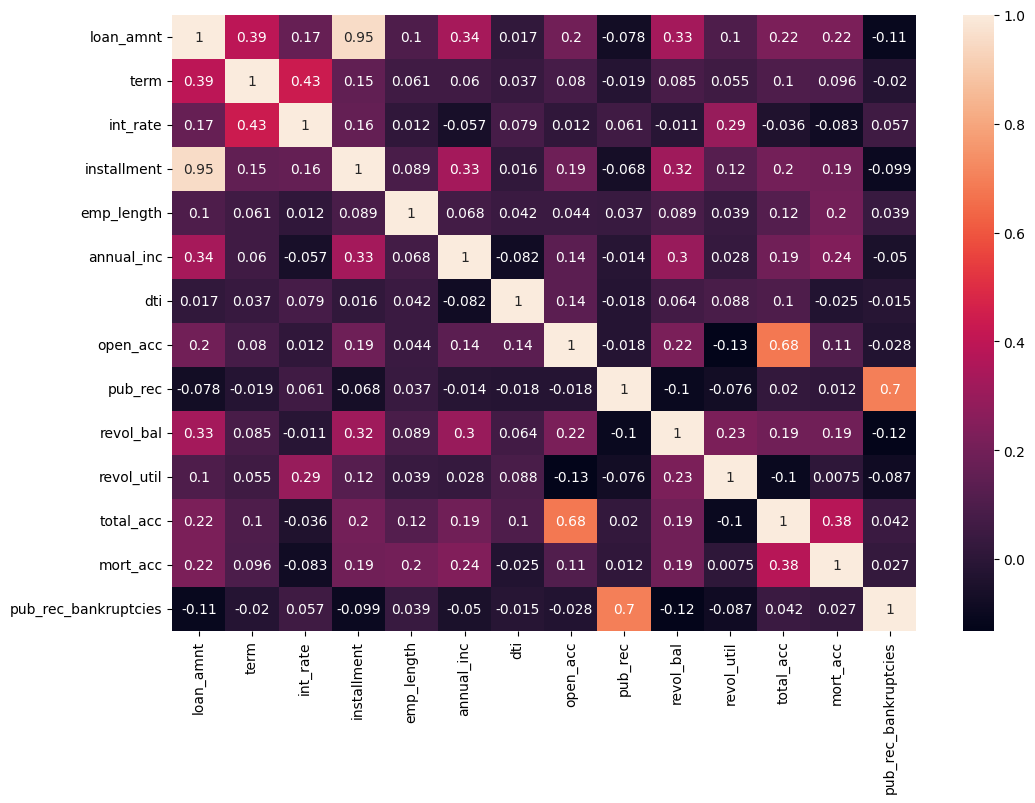

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)


In [ ]:
#There is a significant correlation between loan_amount and installment